In [1]:
import numpy as np # generic math functions
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline

In [2]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import time



t_start=time.time()

def Ham_nonint(L):
    basis = spin_basis_1d(L)
    hz=(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    hx=(np.sqrt(5)+5)/8
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] 
    hx_arr = [[hx,i] for i in range(L)] 
    J_arr =[[J,i,(i+1)] for i in range(L-1)] # OBC  [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["zz",J_arr],["z",hz_arr], ["x",hx_arr] ]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.float_,check_symm=False,check_herm=False)
    return H


def output_gauge_potent(Ham,L):
    E,V= Ham.eigh()
    op_lamb_arr = del_lambda_Ham(L).toarray()
    x=np.dot(op_lamb_arr, V)
    num_lamb_mat =np.dot(V.T,x) #matrix multiplication
    wij = np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E)
    return wij, num_lamb_mat
  
def gauge_potent_mu(wij,num_lamb_mat,mu):
    A_lamb = -1j*np.multiply(wij,num_lamb_mat)/(wij**2+ mu**2)#element-wise multiplication
    return A_lamb


def del_lambda_Ham(L):
    basis = spin_basis_1d(L)  
    hx_lamb=1.0
    hx_lamb_arr = [[hx_lamb,i] for i in range(L)] 
    static_lamb = [["x",hx_lamb_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.float_,check_symm=False,check_herm=False)
    return op_lamb

def norm(A_lamb):    
    return np.linalg.norm(A_lamb, 'fro')

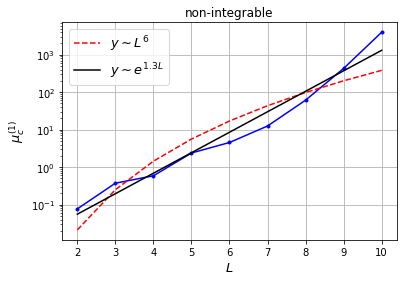

In [35]:
plt.semilogy(L_arr, norm_arr_nonint,'b.-' )
plt.semilogy(L_arr, poly_func(L_arr,np.exp(alpha_poly),beta_poly),'r--', label=r"$ y  \sim L^{6} $")
plt.semilogy(L_arr, exp_func(L_arr_int,np.exp(alpha_exp),beta_exp),'k-', label=r"$ y  \sim e^{1.3 L} $")
plt.ylabel(r"$\mu_c^{(1)}$", fontsize=13)
plt.xlabel(r"$L$", fontsize=13)
plt.title("non-integrable")
plt.legend(loc='best', fontsize=13)
plt.grid()
#plt.grid(which='major')
#plt.grid(which='minor')
#plt.savefig("mu_c_1_nonint.eps")

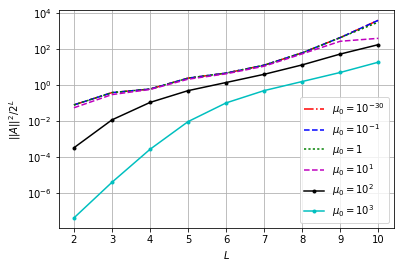

In [158]:
plt.semilogy(L_arr, norm_arr_nonint,'r-.' , label=r'$\mu_0=10^{-30}$')
plt.semilogy(L_arr, norm_arr_nonint_tenth_scaled_mu,'b--', label=r'$\mu_0=10^{-1}$')
plt.semilogy(L_arr, norm_arr_nonint_one_scaled_mu,'g:' , label=r'$\mu_0=1$')
plt.semilogy(L_arr, norm_arr_nonint_ten_scaled_mu,'m--' , label=r'$\mu_0=10^{1}$')
plt.semilogy(L_arr, norm_arr_nonint_hundred_scaled_mu,'k.-' , label=r'$\mu_0=10^{2}$')
plt.semilogy(L_arr, norm_arr_nonint_thousand_scaled_mu,'c.-', label=r'$\mu_0=10^{3}$')
plt.legend()
plt.grid()
plt.xlabel(r'$L$')
plt.ylabel(r'$||A||^2/2^L$')
plt.savefig("scaling_exp_poly.eps")

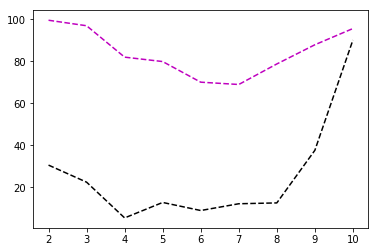

In [114]:
#plt.plot(L_arr, -100*(norm_arr_nonint_scaled_mu-norm_arr_nonint)/norm_arr_nonint ,'r+-' )
#plt.plot(L_arr, -100*(norm_arr_nonint_tenth_scaled_mu-norm_arr_nonint)/norm_arr_nonint ,'b.-' )
plt.plot(L_arr, -100*(norm_arr_nonint_ten_scaled_mu-norm_arr_nonint)/norm_arr_nonint ,'k--' )
plt.plot(L_arr, -100*(norm_arr_nonint_hundred_scaled_mu-norm_arr_nonint)/norm_arr_nonint ,'m--' )

In [142]:
###parameters
mu=1e-30
###parameters

L_arr=range(2,11)
L_arr_int=np.arange(2,11)
mu_eff=np.exp(-L_arr_int)*mu

for i in range(len(L_arr)):
	L=L_arr[i]
	H=Ham_nonint(L)
	wij, num_lamb_mat=output_gauge_potent(H,L)
	A_lamb=gauge_potent_mu(wij, num_lamb_mat,mu_eff[i])
	norm_arr_nonint[i]=norm(A_lamb)**2/2**L

In [128]:
print norm_arr_nonint

[  7.67963087e-02   3.72952010e-01   5.87481319e-01   2.38325614e+00
   4.54381091e+00   1.25208990e+01   6.11881542e+01   4.31038291e+02
   3.97640477e+03]


In [132]:
###parameters
mu=1e-1

L_arr=range(2,11)
L_arr_int=np.arange(2,11)
mu_eff=np.exp(-L_arr_int)*mu
norm_arr_nonint_tenth_scaled_mu=np.zeros(len(L_arr))

t_start_nonint=time.time()
###nonint
###finding minimum and maximum wij
###running the loop    
for i in range(len(L_arr)):
	L=L_arr[i]
	H=Ham_nonint(L)
	wij, num_lamb_mat=output_gauge_potent(H,L)
	A_lamb=gauge_potent_mu(wij, num_lamb_mat,mu_eff[i])
	norm_arr_nonint_tenth_scaled_mu[i]=norm(A_lamb)**2/2**L

In [135]:
###parameters
mu=1.0

L_arr=range(2,11)
L_arr_int=np.arange(2,11)
mu_eff=np.exp(-L_arr_int)*mu
norm_arr_nonint_one_scaled_mu=np.zeros(len(L_arr))

t_start_nonint=time.time()
###nonint
###finding minimum and maximum wij
###running the loop    
for i in range(len(L_arr)):
	L=L_arr[i]
	H=Ham_nonint(L)
	wij, num_lamb_mat=output_gauge_potent(H,L)
	index_lower = np.tril_indices(2**L,-1)
	wij_arr=wij[index_lower]
	A_lamb=gauge_potent_mu(wij, num_lamb_mat,mu_eff[i])
	norm_arr_nonint_one_scaled_mu[i]=norm(A_lamb)**2/2**L

In [99]:
###parameters
mu=10.0
L_arr=range(2,11)
L_arr_int=np.arange(2,11)
mu_eff=np.exp(-L_arr_int)*mu
norm_arr_nonint_ten_scaled_mu=np.zeros(len(L_arr))

###

###nonint
###finding minimum and maximum wij
###running the loop    
for i in range(len(L_arr)):
	L=L_arr[i]
	H=Ham_nonint(L)
	wij, num_lamb_mat=output_gauge_potent(H,L)
	index_lower = np.tril_indices(2**L,-1)
	wij_arr=wij[index_lower]
	A_lamb=gauge_potent_mu(wij, num_lamb_mat,mu_eff[i])
	norm_arr_nonint_ten_scaled_mu[i]=norm(A_lamb)**2/2**L

In [98]:
###parameters
mu=100.0
L_arr=range(2,11)
L_arr_int=np.arange(2,11)
mu_eff=np.exp(-L_arr_int)*mu
norm_arr_nonint_hundred_scaled_mu=np.zeros(len(L_arr))

###

###nonint
###finding minimum and maximum wij
###running the loop    
for i in range(len(L_arr)):
	L=L_arr[i]
	H=Ham_nonint(L)
	wij, num_lamb_mat=output_gauge_potent(H,L)
	index_lower = np.tril_indices(2**L,-1)
	wij_arr=wij[index_lower]
	A_lamb=gauge_potent_mu(wij, num_lamb_mat,mu_eff[i])
	norm_arr_nonint_hundred_scaled_mu[i]=norm(A_lamb)**2/2**L

In [146]:
###parameters
mu=1000.0
L_arr=range(2,11)
L_arr_int=np.arange(2,11)
mu_eff=np.exp(-L_arr_int)*mu
norm_arr_nonint_thousand_scaled_mu=np.zeros(len(L_arr))

###

###nonint
###finding minimum and maximum wij
###running the loop    
for i in range(len(L_arr)):
	L=L_arr[i]
	H=Ham_nonint(L)
	wij, num_lamb_mat=output_gauge_potent(H,L)
	index_lower = np.tril_indices(2**L,-1)
	wij_arr=wij[index_lower]
	A_lamb=gauge_potent_mu(wij, num_lamb_mat,mu_eff[i])
	norm_arr_nonint_thousand_scaled_mu[i]=norm(A_lamb)**2/2**L

In [145]:
print np.exp(-L_arr_int)*10
print np.exp(-L_arr_int)*100
print np.exp(-L_arr_int)*1000

[  1.35335283e+00   4.97870684e-01   1.83156389e-01   6.73794700e-02
   2.47875218e-02   9.11881966e-03   3.35462628e-03   1.23409804e-03
   4.53999298e-04]
[  1.35335283e+01   4.97870684e+00   1.83156389e+00   6.73794700e-01
   2.47875218e-01   9.11881966e-02   3.35462628e-02   1.23409804e-02
   4.53999298e-03]
[  1.35335283e+02   4.97870684e+01   1.83156389e+01   6.73794700e+00
   2.47875218e+00   9.11881966e-01   3.35462628e-01   1.23409804e-01
   4.53999298e-02]


In [92]:
print np.exp(-L_arr_int)*10

array([  1.35335283e+01,   4.97870684e+00,   1.83156389e+00,
         6.73794700e-01,   2.47875218e-01,   9.11881966e-02,
         3.35462628e-02,   1.23409804e-02,   4.53999298e-03])

In [131]:
from scipy.optimize import curve_fit

def logfunc(x, alpha,beta): #log of poly
    return alpha+ beta*x


def poly_func(x, alpha,beta):
    return alpha*x**beta

def exp_func(x, alpha,beta):
    return alpha*np.exp(beta*x)

xdata = L_arr 
ydata = norm_arr_nonint
popt_poly, pcov_poly = curve_fit(logfunc, np.log(xdata), np.log(ydata)) #polynomial fitting
popt_exp, pcov_exp = curve_fit(logfunc, xdata, np.log(ydata)) #exponential fitting 
print popt_poly, np.diag(pcov_poly)
print popt_exp, np.diag(pcov_exp)
alpha_poly,beta_poly=popt_poly
alpha_exp,beta_exp=popt_exp

[-8.07973481  6.09164472] [ 2.469993    0.80396894]
[-5.40903163  1.25878493] [ 0.33143602  0.00776803]


In [133]:
xdata = L_arr 
ydata = norm_arr_nonint_tenth_scaled_mu
popt_poly, pcov_poly = curve_fit(logfunc, np.log(xdata), np.log(ydata)) #polynomial fitting
popt_exp, pcov_exp = curve_fit(logfunc, xdata, np.log(ydata)) #exponential fitting 
print popt_poly, np.diag(pcov_poly)
print popt_exp, np.diag(pcov_exp)
alpha_poly,beta_poly=popt_poly
alpha_exp,beta_exp=popt_exp

[-8.07883508  6.09091553] [ 2.46756887  0.80317989]
[-5.40827626  1.25860503] [ 0.33082881  0.0077538 ]


In [136]:
xdata = L_arr 
ydata = norm_arr_nonint_one_scaled_mu
popt_poly, pcov_poly = curve_fit(logfunc, np.log(xdata), np.log(ydata)) #polynomial fitting
popt_exp, pcov_exp = curve_fit(logfunc, xdata, np.log(ydata)) #exponential fitting 
print popt_poly, np.diag(pcov_poly)
print popt_exp, np.diag(pcov_exp)
alpha_poly,beta_poly=popt_poly
alpha_exp,beta_exp=popt_exp

[-7.99721211  6.02460262] [ 2.25489404  0.73395542]
[-5.33974498  1.24223851] [ 0.27923895  0.00654466]


In [137]:
xdata = L_arr 
ydata = norm_arr_nonint_tenth_scaled_mu
popt_poly, pcov_poly = curve_fit(logfunc, np.log(xdata), np.log(ydata)) #polynomial fitting
popt_exp, pcov_exp = curve_fit(logfunc, xdata, np.log(ydata)) #exponential fitting 
print popt_poly, np.diag(pcov_poly)
print popt_exp, np.diag(pcov_exp)
alpha_poly,beta_poly=popt_poly
alpha_exp,beta_exp=popt_exp

[-8.07883508  6.09091553] [ 2.46756887  0.80317989]
[-5.40827626  1.25860503] [ 0.33082881  0.0077538 ]


In [140]:
xdata = L_arr 
ydata = norm_arr_nonint_hundred_scaled_mu
popt_poly, pcov_poly = curve_fit(logfunc, np.log(xdata), np.log(ydata)) #polynomial fitting
popt_exp, pcov_exp = curve_fit(logfunc, xdata, np.log(ydata)) #exponential fitting 
print popt_poly, np.diag(pcov_poly)
print popt_exp, np.diag(pcov_exp)
alpha_poly,beta_poly=popt_poly
alpha_exp,beta_exp=popt_exp

[-13.32871359   7.79729942] [ 0.17766253  0.05782816]
[-9.2312103   1.49807589] [ 0.6270879   0.01469737]


In [148]:
xdata = L_arr 
ydata = norm_arr_nonint_thousand_scaled_mu
popt_poly, pcov_poly = curve_fit(logfunc, np.log(xdata), np.log(ydata)) #polynomial fitting
popt_exp, pcov_exp = curve_fit(logfunc, xdata, np.log(ydata)) #exponential fitting 
print popt_poly, np.diag(pcov_poly)
print popt_exp, np.diag(pcov_exp)
alpha_poly,beta_poly=popt_poly
alpha_exp,beta_exp=popt_exp

[-25.7542807   12.65818581] [ 0.39588552  0.12885853]
[-18.85246206   2.39033506] [ 2.8383867   0.06652469]


## $\mu_c^{2}$ linear scaling

In [3]:
###parameters
mu=1000.0
L_arr=range(2,11)
L_arr_int=np.arange(2,11)
mu_eff=mu*L_arr_int
norm_arr_nonint_thousand_scaled_mu=np.zeros(len(L_arr))

###

###nonint
###finding minimum and maximum wij
###running the loop    
for i in range(len(L_arr)):
	L=L_arr[i]
	H=Ham_nonint(L)
	wij, num_lamb_mat=output_gauge_potent(H,L)
	index_lower = np.tril_indices(2**L,-1)
	wij_arr=wij[index_lower]
	A_lamb=gauge_potent_mu(wij, num_lamb_mat,mu_eff[i])
	norm_arr_nonint_thousand_scaled_mu[i]=norm(A_lamb)**2/2**L

In [8]:
mu=500.0
L_arr=range(2,11)
L_arr_int=np.arange(2,11)
mu_eff=mu*L_arr_int
norm_arr_nonint_500_scaled_mu=np.zeros(len(L_arr))

###

###nonint
###finding minimum and maximum wij
###running the loop    
for i in range(len(L_arr)):
	L=L_arr[i]
	H=Ham_nonint(L)
	wij, num_lamb_mat=output_gauge_potent(H,L)
	index_lower = np.tril_indices(2**L,-1)
	wij_arr=wij[index_lower]
	A_lamb=gauge_potent_mu(wij, num_lamb_mat,mu)
	norm_arr_nonint_500_scaled_mu[i]=norm(A_lamb)**2/2**L

In [10]:
mu=250
L_arr=range(2,11)
L_arr_int=np.arange(2,11)
mu_eff=mu*L_arr_int
norm_arr_nonint_250_scaled_mu=np.zeros(len(L_arr))

###

###nonint
###finding minimum and maximum wij
###running the loop    
for i in range(len(L_arr)):
	L=L_arr[i]
	H=Ham_nonint(L)
	wij, num_lamb_mat=output_gauge_potent(H,L)
	index_lower = np.tril_indices(2**L,-1)
	wij_arr=wij[index_lower]
	A_lamb=gauge_potent_mu(wij, num_lamb_mat,mu)
	norm_arr_nonint_250_scaled_mu[i]=norm(A_lamb)**2/2**L

In [12]:
mu=150
L_arr=range(2,11)
L_arr_int=np.arange(2,11)
mu_eff=mu*L_arr_int
norm_arr_nonint_150_scaled_mu=np.zeros(len(L_arr))

###

###nonint
###finding minimum and maximum wij
###running the loop    
for i in range(len(L_arr)):
	L=L_arr[i]
	H=Ham_nonint(L)
	wij, num_lamb_mat=output_gauge_potent(H,L)
	index_lower = np.tril_indices(2**L,-1)
	wij_arr=wij[index_lower]
	A_lamb=gauge_potent_mu(wij, num_lamb_mat,mu)
	norm_arr_nonint_150_scaled_mu[i]=norm(A_lamb)**2/2**L

In [15]:
mu=125
L_arr=range(2,11)
L_arr_int=np.arange(2,11)
mu_eff=mu*L_arr_int
norm_arr_nonint_125_scaled_mu=np.zeros(len(L_arr))

###

###nonint
###finding minimum and maximum wij
###running the loop    
for i in range(len(L_arr)):
	L=L_arr[i]
	H=Ham_nonint(L)
	wij, num_lamb_mat=output_gauge_potent(H,L)
	index_lower = np.tril_indices(2**L,-1)
	wij_arr=wij[index_lower]
	A_lamb=gauge_potent_mu(wij, num_lamb_mat,mu)
	norm_arr_nonint_125_scaled_mu[i]=norm(A_lamb)**2/2**L

In [32]:
mu=100.0
L_arr=range(2,11)
L_arr_int=np.arange(2,11)
mu_eff=mu*L_arr_int
norm_arr_nonint_100_scaled_mu=np.zeros(len(L_arr))

###

###nonint
###finding minimum and maximum wij
###running the loop    
for i in range(len(L_arr)):
	L=L_arr[i]
	H=Ham_nonint(L)
	wij, num_lamb_mat=output_gauge_potent(H,L)
	index_lower = np.tril_indices(2**L,-1)
	wij_arr=wij[index_lower]
	A_lamb=gauge_potent_mu(wij, num_lamb_mat,mu)
	norm_arr_nonint_100_scaled_mu[i]=norm(A_lamb)**2/2**L

In [165]:
print mu/L_arr_int

[ 500.          333.33333333  250.          200.          166.66666667
  142.85714286  125.          111.11111111  100.        ]


In [17]:
###parameters
mu=100.0
L_arr=range(2,11)
L_arr_int=np.arange(2,11)
mu_eff=mu*L_arr_int
norm_arr_nonint_100_scaled_mu=np.zeros(len(L_arr))

###

###nonint
###finding minimum and maximum wij
###running the loop    
for i in range(len(L_arr)):
	L=L_arr[i]
	H=Ham_nonint(L)
	wij, num_lamb_mat=output_gauge_potent(H,L)
	index_lower = np.tril_indices(2**L,-1)
	wij_arr=wij[index_lower]
	A_lamb=gauge_potent_mu(wij, num_lamb_mat,mu_eff[i])
	norm_arr_nonint_100_scaled_mu[i]=norm(A_lamb)**2/2**L

In [13]:
###parameters
mu=10.0
L_arr=range(2,11)
L_arr_int=np.arange(2,11)
mu_eff=mu*L_arr_int
norm_arr_nonint_ten_scaled_mu=np.zeros(len(L_arr))

###

###nonint
###finding minimum and maximum wij
###running the loop    
for i in range(len(L_arr)):
	L=L_arr[i]
	H=Ham_nonint(L)
	wij, num_lamb_mat=output_gauge_potent(H,L)
	index_lower = np.tril_indices(2**L,-1)
	wij_arr=wij[index_lower]
	A_lamb=gauge_potent_mu(wij, num_lamb_mat,mu_eff[i])
	norm_arr_nonint_ten_scaled_mu[i]=norm(A_lamb)**2/2**L

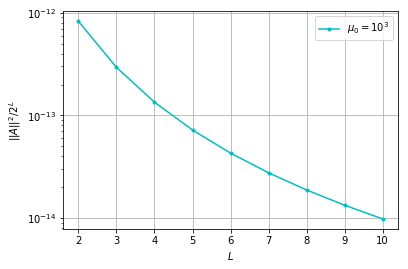

In [4]:
#plt.semilogy(L_arr, norm_arr_nonint_100_scaled_mu,'r-.' , label=r'$\mu_0=100$')
#plt.semilogy(L_arr, norm_arr_nonint_125_scaled_mu,'b--', label=r'$\mu_0=10^{-1}$')
#plt.semilogy(L_arr, norm_arr_nonint_150_scaled_mu,'g:' , label=r'$\mu_0=150$')
#plt.semilogy(L_arr, norm_arr_nonint_250_scaled_mu,'m--' , label=r'$\mu_0=250$')
#plt.semilogy(L_arr, norm_arr_nonint_500_scaled_mu,'k.-' , label=r'$\mu_0=500$')
plt.semilogy(L_arr, norm_arr_nonint_thousand_scaled_mu,'c.-', label=r'$\mu_0=10^{3}$')
plt.legend()
plt.grid()
plt.xlabel(r'$L$')
plt.ylabel(r'$||A||^2/2^L$')
#plt.savefig("scaling_exp_poly.eps")